In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold,datasets
from sklearn.svm import SVC

In [5]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

## Visualze MNIST dataset with subplots

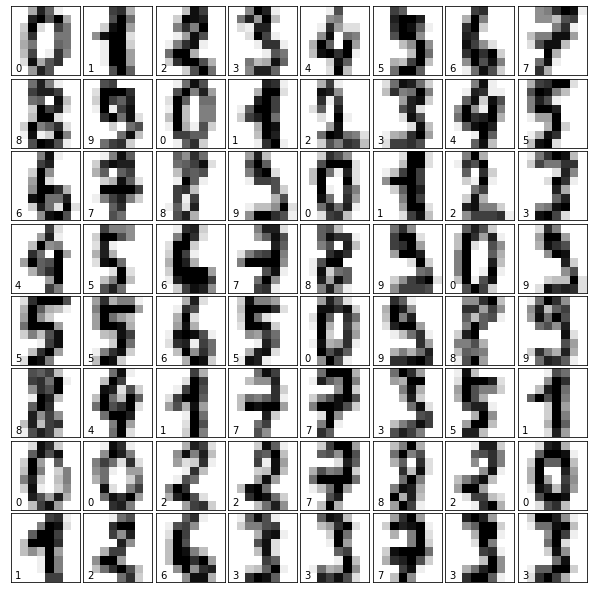

In [6]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary,interpolation='nearest')
    #labels
    ax.text(0,7,str(digits.target[i]))

In [8]:
#split data
from sklearn.model_selection import train_test_split
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
#SVM instance
model = SVC(kernel='rbf')
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)

## Metrics for multiclass classification

In [11]:
from sklearn import metrics
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.97      0.99        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        39
           8       0.97      1.00      0.99        38
           9       0.98      0.98      0.98        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



## Confussion matrix for the multiclass Classifier

In [13]:
print(metrics.confusion_matrix(ypred,ytest))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns;sns.set()

In [16]:
from sklearn.datasets import fetch_lfw_people as flp
faces = flp(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


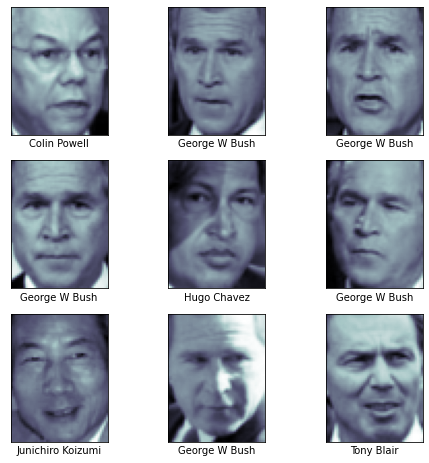

In [39]:
fig, ax = plt.subplots(3,3,figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],
           xlabel=faces.target_names[faces.target[i]]);

each image contain [62x47] = 2914 pixels => we could use all features to train the model but it is more effective to use a sort of prerprocessor to extract more meaningful features; we'll use PCA to extract 350 fundamental components to feed into the SVM classifier. To do this, we'll package the preprocessor and the clasiffier into a single pipeline

In [19]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components = 350, whiten = True, random_state = 42)
svc = SVC(kernel='linear',class_weight='balanced')
model = make_pipeline(pca,svc)

In [22]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(faces.data,faces.target,
                                             random_state=42,
                                            shuffle=True)

In [23]:
model.fit(Xtrain,ytrain)
yfit = model.predict(Xtest)

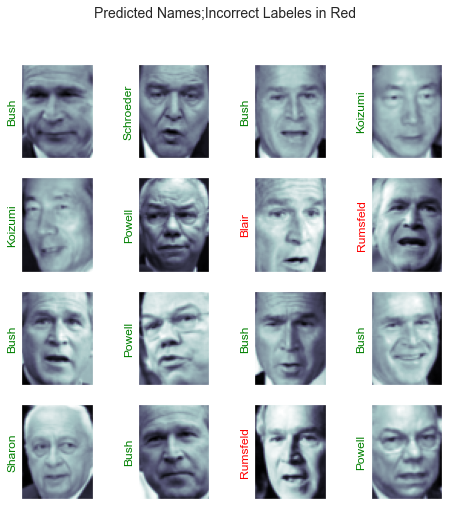

In [25]:
fig,ax = plt.subplots(4,4,figsize=(8,8))
for i,axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color='green' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names;Incorrect Labeles in Red',size=14);

In [34]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.46      0.73      0.56        15
     Colin Powell       0.72      0.76      0.74        68
  Donald Rumsfeld       0.65      0.71      0.68        31
    George W Bush       0.83      0.75      0.79       126
Gerhard Schroeder       0.64      0.70      0.67        23
      Hugo Chavez       1.00      0.70      0.82        20
Junichiro Koizumi       0.79      0.92      0.85        12
       Tony Blair       0.68      0.67      0.67        42

         accuracy                           0.74       337
        macro avg       0.72      0.74      0.72       337
     weighted avg       0.75      0.74      0.74       337



In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,yfit))

[[11  1  1  2  0  0  0  0]
 [ 4 52  3  6  1  0  0  2]
 [ 2  4 22  2  1  0  0  0]
 [ 4 11  5 94  5  0  1  6]
 [ 0  1  2  1 16  0  0  3]
 [ 1  1  0  1  1 14  0  2]
 [ 0  0  0  1  0  0 11  0]
 [ 2  2  1  6  1  0  2 28]]
